## Moments

Python implementation of Image Moments, validated with opencv.

    * Raw moments
    * Central Moments: translation invariance
    * Scale Invariants
    * Hu Moments: rotation invariant
    
#### Applications:
    * blob detection, centroids,
    * Image intensity rotation angles
    * countour matching

https://en.wikipedia.org/wiki/Image_moment

https://github.com/opencv/opencv/blob/master/modules/imgproc/src/moments.cpp

#### match contours:
https://github.com/opencv/opencv/blob/master/imgproc/src/matchcontours.cpp
#### features:
https://github.com/opencv/opencv/blob/master/modules/features2d/src/blobdetector.cpp

https://github.com/opencv/opencv/blob/master/modules/features2d/src/evaluation.cpp
#### camera tracking
https://github.com/opencv/opencv/blob/master/modules/video/src/camshift.cpp
#### demo
https://github.com/opencv/opencv/blob/master/samples/cpp/tutorial_code/ShapeDescriptors/moments_demo.cpp
#### contour centroids
https://docs.opencv.org/3.4.12/d0/d49/tutorial_moments.html

#### match rotation and translation in brain images. 
https://content.iospress.com/articles/bio-medical-materials-and-engineering/bme1426



In [1]:
%config IPCompleter.use_jedi = False
# %xmode Verbose
# %xmode context
%pdb off
# %load_ext viztracer
# from viztracer import VizTracer
%load_ext autoreload
%autoreload 3
from copy import deepcopy
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pyphoplacecellanalysis.Analysis.Decoder.computer_vision import ComputerVisionComputations

Automatic pdb calling has been turned OFF


In [2]:
images_parent_path = Path(r'E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors\2024-08-28\laps\long_LR\greyscale').resolve()
assert images_parent_path.exists()

active_image_path = Path(r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors\2024-08-28\laps\long_LR\greyscale\p_x_given_n[6].png")
pimg = Image.open(active_image_path)
img = np.array(pimg)
r = deepcopy(img)


type(img): <class 'numpy.ndarray'>
np.shape(img): (57, 23)
img.dtype: uint8


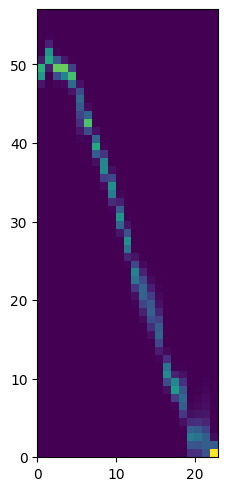

In [3]:
lap_path = r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors\2024-08-28\laps\long_LR\greyscale\p_x_given_n[6].png"

replay_paths = [
	r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors\2024-08-28\ripple\long_LR\greyscale\p_x_given_n[70].png",
	r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors\2024-08-28\ripple\long_LR\greyscale\p_x_given_n[72].png",
	r"E:\Dropbox (Personal)\Active\Kamran Diba Lab\Pho-Kamran-Meetings\2024-08-20 - Finalizing Transition Matrix\_temp_individual_posteriors\2024-08-28\ripple\long_LR\greyscale\p_x_given_n[136].png",
]

lap_img = ComputerVisionComputations.load_image(lap_path)
replay_imgs = [ComputerVisionComputations.load_image(p) for p in replay_paths]

ComputerVisionComputations.imshow(lap_img)
ComputerVisionComputations.debug_print_img_info(lap_img)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x25ac68e0f40>)

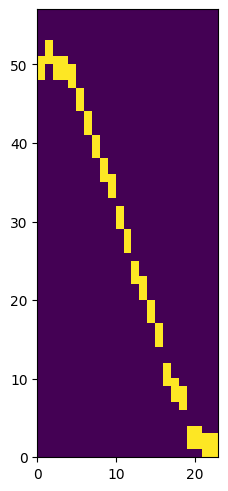

In [4]:
lap_bw_top_values_mask, lap_masked_img = ComputerVisionComputations.top_N_values_binarization(lap_img, top_n=3, non_included_index_value=0)
ComputerVisionComputations.imshow(lap_bw_top_values_mask)
# ComputerVisionComputations.imshow(lap_masked_img)


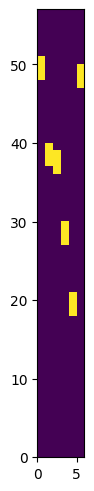

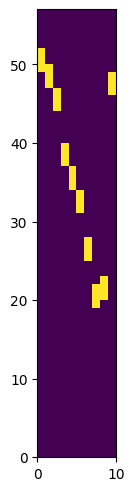

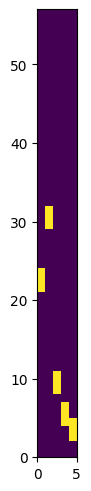

In [5]:

replay_bw_top_values_masks = []
for img in replay_imgs:
	bw_top_values_mask, masked_img = ComputerVisionComputations.top_N_values_binarization(img, top_n=3, non_included_index_value=0)
	replay_bw_top_values_masks.append(bw_top_values_mask)
	ComputerVisionComputations.imshow(bw_top_values_mask)
	

# plt.figure(); plt.imshow(bw_top_values_mask)
# plt.figure(); plt.imshow(masked_img)






In [ ]:

ComputerVisionComputations.imshow(replay_imgs[0])
ComputerVisionComputations.imshow(replay_imgs[1])
ComputerVisionComputations.imshow(replay_imgs[2])



In [ ]:
np.shape(replay_imgs[0])

In [ ]:
# import io
# import requests
# url = "https://i.guim.co.uk/img/media/abea6c172005fdb1bdb58ec414cac103cc17fbcf/0_0_3200_2133/master/3200.jpg?width=1920&quality=85&auto=format&fit=max&s=85ad7aacebff455b845b05c43dbbd8c6"
# req = requests.get(url)
# print (req)
# pimg = Image.open(io.BytesIO(req.content))
# img = np.array(pimg)
# r = img[:,:,0] # just the red component of the image

In [ ]:
moments, hu_moments, *extras = ComputerVisionComputations.image_moments(lap_img)
moments

In [ ]:
print(img.shape) # (1280, 1920, 3)
print(r.shape) # (1280, 1920)
plt.imshow(img)
plt.show()

## OpenCV moments on Intensity, per channel

In [ ]:
moments = cv2.moments(r)
# m_ij: raw moments
# mu_ij: central moments, translation invariant
# nu_ij: scale invariants
hu_moments = cv2.HuMoments(moments)
# hu moments, rotation invariant

In [ ]:
moments

## Raw Moments


$ M_{ij} = \sum_x \sum_y x^iy^j I(x,y) $ with pixel intensities   $ I(x,y)$

$ M_{00} = \sum_x \sum_y I(x,y) \text{ : Itensities}$

$ M_{11} = \sum_x \sum_y xy I(x,y) \text{ : Itensities . Positions}$

$ M_{20} = \sum_x \sum_y x^2 I(x,y) \text{ }$

    ... 

In [ ]:
## Moments returned in xy
def moment_raw(r, i, j):
    _x = np.arange(r.shape[0])**j
    _y = np.arange(r.shape[1])**i
    _XX, _YY = np.meshgrid(_y, _x)
    return (_XX*_YY*r).sum()

def centroid(M00,M10,M01):
    return M10/(M00 + 1e-5), M01/(M00 + 1e-5)

In [ ]:
print("Area", np.prod(np.asarray(r.shape)))

In [ ]:
M00 = moment_raw(r, 0,0)
M10 = moment_raw(r, 1,0)
M01 = moment_raw(r, 0,1)
M11 = moment_raw(r, 1,1)
M20 = moment_raw(r, 2,0)
M02 = moment_raw(r, 0,2)
M21 = moment_raw(r, 2,1)
M12 = moment_raw(r, 1,2)
M30 = moment_raw(r, 3,0)
M03 = moment_raw(r, 0,3)
x_, y_ = centroid(M00, M10, M01)

M00, M11, M10

### central moments
    translationally invariant

$ \mu_{pq} = \sum_x \sum_y (x - \bar{x})^p (y - \bar{y})^q f(x,y) $

In [ ]:
mu00 = M00 
mu01 = 0
mu10 = 0
mu11 = M11 - x_* M01 # = M11 - y_* M10
mu20 = M20 - x_ * M10
mu02 = M02 - y_ * M01
mu21 = M21 - 2*x_ * M11 - y_ * M20 + 2 * x_**2 * M01
mu12 = M12 - 2*y_ * M11 - x_ * M02 + 2 * y_**2 * M10

mu30 = M30 - 3*x_ * M20 + 2 * x_**2 * M10
mu03 = M03 - 3*y_ * M02 + 2 * y_**2 * M01

mu11, mu20, mu02, mu21, mu12, mu30, mu03

In [ ]:
imflip = np.array(pimg.transpose(Image.FLIP_LEFT_RIGHT))
plt.imshow(imflip)
plt.show()
if np.ndim(imflip) > 2:
	imflip = imflip[:,:, 0]
flipmoments = cv2.moments(imflip)
print("mu20 = flipmu20 (%.1f = %.1f)"%(flipmoments["mu20"], moments["mu20"]))
print("mu21 = flipmu21 (%.1f = %.1f)"%(flipmoments["mu21"], moments["mu21"]))
print("...\n central moments are translationally invariant")


### Image Orientation Covariance Matrix from second order central moments
    from wikipedia

$ \mu'_{20} = \frac{\mu_{20}}{\mu_{00}} = \frac{M_{20}}{M_{00}} - \bar{x}^2$

$ \mu'_{02} = \frac{\mu_{02}}{\mu_{00}} = \frac{M_{02}}{M_{00}} - \bar{y}^2$

$ \mu'_{11} = \frac{\mu_{11}}{\mu_{00}} = \frac{M_{11}}{M_{00}} - \bar{x}\bar{y}$

$ \text{cov}[I(x,y)] = \begin{bmatrix} \mu'_{20} & \mu'_{11} \\\mu'_{11} & \mu'_{02}   \end{bmatrix}$ 

    eigenvectors major and minor axis of intensity
    angle to nearest eigenvector
    
$\Theta = \frac{1}{2}\text{arctan}\left(\frac{2\mu'_{11}} {\mu'_{20} - \mu_{02}}\right) $

    eigenvalues
$\lambda_i = \frac{\mu'_{20} + \mu'_{02}}{2} \pm \frac{\sqrt{4\mu'_{11}*2 +(\mu'_{20} - \mu_{02})^2}}{2}$

In [ ]:
# mu00 == m00
mup_20 = mu20/mu00 - x_**2
mup_02 = mu02/mu00 - y_**2
mup_11 = mu11/mu00 - x_*y_

theta = np.arctan(2*mup_11/(mup_20 - mup_02))/2
print("intensity orientation %.3f deg, centroid (%.2f, %.2f)"%((theta*180/np.pi), x_, y_))

cov_Ixy = np.array([[mup_20, mup_11],[mup_11, mup_02]])
cov_Ixy

In [ ]:
def intensity_orientation(img, moments, figsize=(15,8)):
    
    #m00, m10, m01, m11, m20, m02,
    center = np.array(img.shape[:2])/2
    
    # centroid
    x_, y_ =  moments["m10"]/(moments["m00"] + 1e-5), moments["m01"]/(moments["m00"] + 1e-5)
    
    # second order central moments
    mup_20 = moments["mu20"]/moments["m00"] - x_**2
    mup_02 = moments["mu02"]/moments["m00"] - y_**2
    mup_11 = moments["mu11"]/moments["m00"] - x_*y_

    # angle
    theta = np.arctan(2*mup_11/(mup_20 - mup_02))/2
    print("intensity orientation %.3f deg, centroid (%.2f, %.2f)"%((theta*180/np.pi), x_, y_))
    
    
    # intensity covariance
    cov_Ixy = np.array([[mup_20, mup_11],[mup_11, mup_02]])
    print("cov I(x,y)\n", cov_Ixy)
    
    # eigen vectors and values
    evals, evecs = np.linalg.eig(cov_Ixy)
    
    print("evals\n", evals)
    print("evecs\n", evecs)

    plt.figure(figsize=figsize)
    plt.imshow(img)

    for e, v in zip(evals, evecs):
        plt.plot([x_, np.sqrt(np.abs(e))*v[0]+x_], [y_, np.sqrt(np.abs(e))*v[1]+y_], 'r-', lw=2)

    plt.scatter(x_, y_, color="yellow")
    plt.annotate("I(x,y) centroid",[ x_+15, y_-10], color="yellow" )

    plt.xticks([0, x_, img.shape[1]], [0, int(x_), img.shape[1]])
    plt.yticks([0, y_, img.shape[0]], [0, int(y_), img.shape[0]])

    plt.grid()
    plt.show()

In [ ]:
intensity_orientation(img, moments)

In [ ]:
imrot = np.array(pimg.transpose(Image.ROTATE_90))
if np.ndim(imrot) > 2:
	imrot = imrot[:,:, 0]
rm = cv2.moments(imrot)
intensity_orientation(imrot, rm)

## scale invariants

$ \eta_{ij} = \frac{\mu_{ij}}{\mu{00}^{(1 + \frac{i+j}{2})}}$

In [ ]:
# mu13, ... are set to 1 for convenience - not computed or used
mus = np.array([[mu00, mu01, mu02, mu03],[mu10,mu11,mu12, 1],[mu20,mu21, 1, 1],[mu30,1, 1, 1]])
for i, _mu in enumerate(mus):
    for j, _muu in enumerate(_mu):
        if i + j <= 3:
            print("mu%d%d\t"%(i, j),_muu)

In [ ]:
nus = lambda i, j, mus: mus[i,j]/ (mus[0,0]**(1 + (i+j)/2))

for ij in [(2,0), (1,1), (0,2), (3,0), (2,1), (1,2), (0, 3)]:
    print("nu%d%d\t"%(ij[0], ij[1]), nus(*ij, mus))

In [ ]:
imgsz = np.array(pimg.resize(tuple(np.array(pimg.size)//2), resample=Image.LANCZOS))
if np.ndim(imgsz) > 2:
	imgsz = imgsz[:,:, 0]
szmoments = cv2.moments(imgsz)
for k in szmoments:
    if "nu" in k:
        print(k, szmoments[k])
print("\nresized image have the same scale invariant moments ")

### rotation invariants Hu moments
    based on scale invariants, neither independent nor complete? (Flusser 2000)

$ I_1 = \eta_{20} + \eta_{02}$      **moment of inertia**

$ I_2 = (\eta_{20} - \eta_{02})^2 + 4\eta_{11}^2 $

$ I_3 = (\eta_{30} - 3\eta_{12})^2 +(3\eta_{21} - \eta_{03})^2 $

$ I_4 = (\eta_{30} + \eta_{12})^2 +(\eta_{21} - \eta_{03})^2 $

$ I_5 = (\eta_{30} - 3\eta_{12})(\eta_{30} +\eta_{12}) [(\eta_{30} + \eta_{12})^2  - 3(\eta_{21} - \eta_{03})^2] + (3\eta_{21} - \eta_{03})(\eta_{21} +\eta_{02}) [3(\eta_{30} + \eta_{12})^2  - (\eta_{21} - \eta_{03})^2]$

$ I_6 = (\eta_{20} - \eta_{02})[(\eta_{30} + \eta_{12})^2-(\eta_{21} + \eta_{03})^2] + 4\eta_{11}(\eta_{30} + \eta_{12})(\eta_{21} + \eta_{03}) $

$ I_7 = (3\eta_{21}-\eta_{03})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2-3(\eta_{21}+\eta_{03})^2]-(\eta_{30} - 3\eta_{12})(\eta_{21} +\eta_{03})[3(\eta_{30} + \eta_{12})^2 - (\eta_{21}+\eta_{03})^2]$    **skew invariant**

In [ ]:
hu_moments = cv2.HuMoments(moments)
rot_hu_moments = cv2.HuMoments(rm)
resz_hu_moments = cv2.HuMoments(szmoments)

In [ ]:
print(hu_moments)
print("hu moments (image) = hu moments (rotated image)")
print(rot_hu_moments)
print("hu moments (image) = hu moments (scaled image)")
print(resz_hu_moments)

In [6]:
import numpy as np
import cv2 as cv
 
# filename = 'chessboard2.jpg'
filename = lap_path
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
 
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
 
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
 
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv.imshow('img', img)
k = cv.waitKey(0)


: 

In [ ]:
import cv2 as cv


## INPUTS: lap_img
print(lap_img.shape) # (1280, 1920, 3)
# print(r.shape) # (1280, 1920)
# plt.imshow(img)
# plt.show()

# gray = deepcopy(r)

# gray = cv.cvtColor(lap_img, cv.COLOR_BGR2GRAY)
gray = deepcopy(lap_img)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
 
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()] = [0,0,255]
 
cv.imshow('dst',img)